**Loading of Datasets**

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_test[0].shape

(28, 28)

Digit class: 5


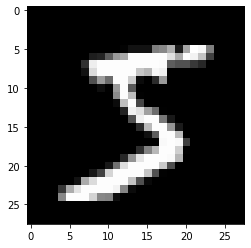

In [ ]:
plt.imshow(X_train[0], 'gray')
print("Digit class:", y_train[0])

Data Trasnsformation

In [ ]:
#Input Data Trasformation
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#Output Data Trasformation (Labeling)
from keras.utils import np_utils 
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
traintensor = X_train.reshape(60000, 28, 28, 1)
testtensor = X_test.reshape(10000, 28, 28, 1)

traintensor.shape

(60000, 28, 28, 1)

**Building Model Architecture**

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.models import Model

In [ ]:
#model one
img_rows = 28
img_cols = 28
kernel_size = 3
pool_size = 2

model = Sequential()

model.add(Convolution2D(16, (kernel_size, kernel_size),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32, (kernel_size, kernel_size)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

model_history = model.fit(
    traintensor,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=2,
    validation_data=(testtensor, Y_test)
)

Epoch 1/20
469/469 - 46s - loss: 0.2919 - accuracy: 0.9105 - val_loss: 0.0666 - val_accuracy: 0.9794
Epoch 2/20
469/469 - 2s - loss: 0.1052 - accuracy: 0.9689 - val_loss: 0.0479 - val_accuracy: 0.9849
Epoch 3/20
469/469 - 2s - loss: 0.0788 - accuracy: 0.9754 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 4/20
469/469 - 2s - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.0337 - val_accuracy: 0.9892
Epoch 5/20
469/469 - 2s - loss: 0.0565 - accuracy: 0.9827 - val_loss: 0.0329 - val_accuracy: 0.9885
Epoch 6/20
469/469 - 2s - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 7/20
469/469 - 2s - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 8/20
469/469 - 2s - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 9/20
469/469 - 2s - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0300 - val_accuracy: 0.9896
Epoch 10/20
469/469 - 2s - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0286 - val_accuracy: 0.990

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


313/313 [==============================] - 1s 2ms/step - loss: 0.0302 - accuracy: 0.9914
Test loss 0.030179103836417198
Test accuracy 0.9914000034332275


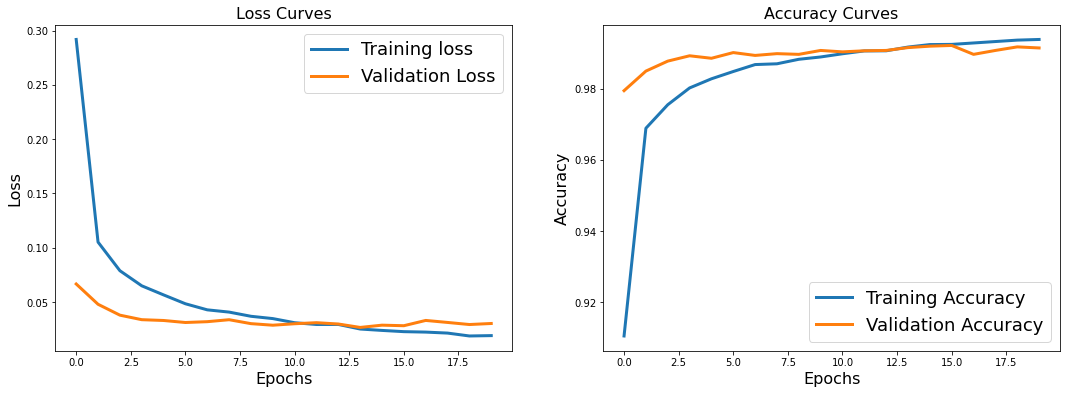

In [ ]:
#Predictinig Accuracy and Loss Value
preds = model.predict_classes(testtensor)

score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

plt.figure(figsize=(18,6))

# Loss Curves
plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], linewidth=3.0)
plt.plot(model_history.history['val_loss'], linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Accuracy Curves
plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], linewidth=3.0)
plt.plot(model_history.history['val_accuracy'], linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
# model two
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

model_history = model.fit(
    traintensor,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=2,
    validation_data=(testtensor, Y_test)
)

Epoch 1/20
469/469 - 3s - loss: 0.2486 - accuracy: 0.9254 - val_loss: 0.0671 - val_accuracy: 0.9780
Epoch 2/20
469/469 - 2s - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 3/20
469/469 - 2s - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0382 - val_accuracy: 0.9882
Epoch 4/20
469/469 - 2s - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0380 - val_accuracy: 0.9884
Epoch 5/20
469/469 - 2s - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0356 - val_accuracy: 0.9882
Epoch 6/20
469/469 - 2s - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 7/20
469/469 - 2s - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0304 - val_accuracy: 0.9901
Epoch 8/20
469/469 - 2s - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0372 - val_accuracy: 0.9885
Epoch 9/20
469/469 - 2s - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0368 - val_accuracy: 0.9890
Epoch 10/20
469/469 - 2s - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0315 - val_accuracy: 0.9901

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


313/313 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.9899
Test loss 0.045874740928411484
Test accuracy 0.9898999929428101


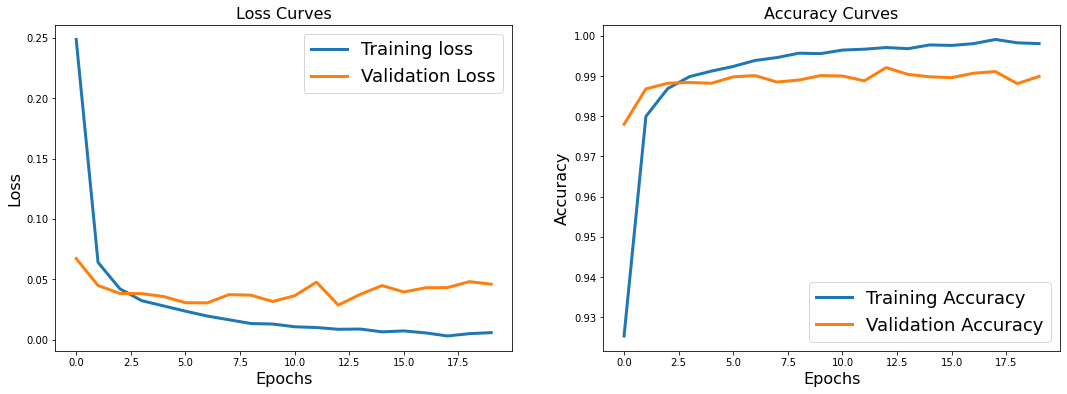

In [ ]:
#Predicting the Accuracy and Loss Value
preds = model.predict_classes(testtensor)

score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

plt.figure(figsize=(18,6))

# Loss Curves
plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], linewidth=3.0)
plt.plot(model_history.history['val_loss'], linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Accuracy Curves
plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], linewidth=3.0)
plt.plot(model_history.history['val_accuracy'], linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [ ]:
layer_outputs = [layer.output for layer in model.layers[1:7]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

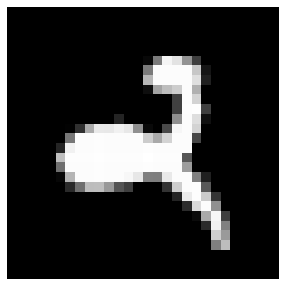

In [ ]:
img = X_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [ ]:
activations = activation_model.predict(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


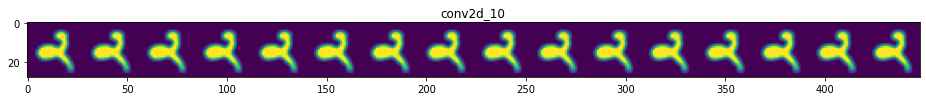

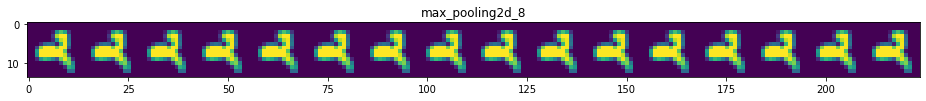

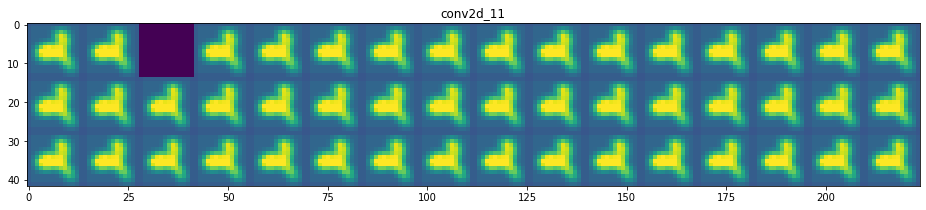

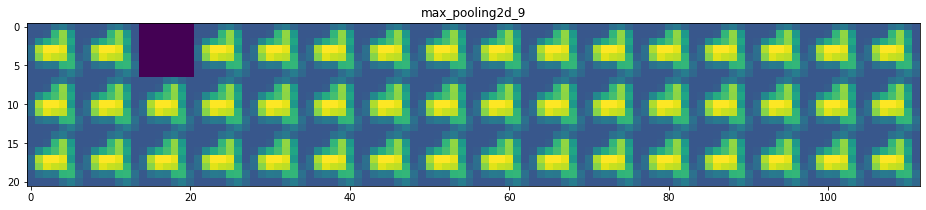

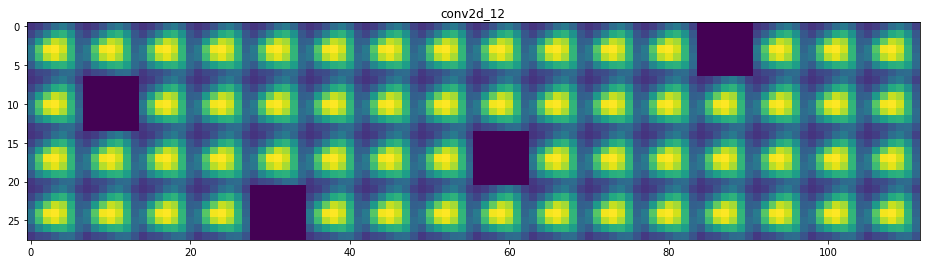

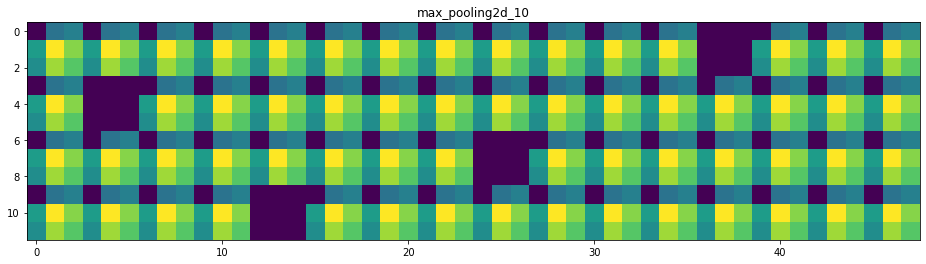

In [ ]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Saving The Model

In [ ]:
from keras.models import load_model

model.save('mnist.h5')